<a href="https://colab.research.google.com/github/Jonathan-code-hub/MAT-422-Math-Methods-in-Data-Science/blob/main/Homework_4_1%2C4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


4.1 Graph Models

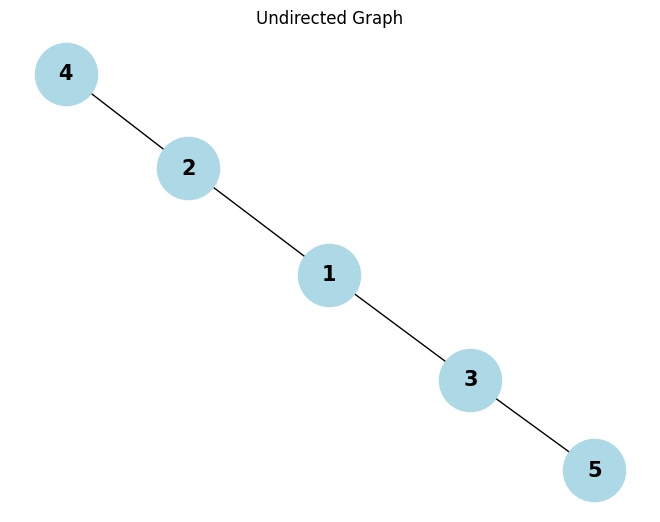

Shortest path from node 1 to node 5: [1, 3, 5]
Degree centrality of nodes: {1: 0.5, 2: 0.5, 3: 0.5, 4: 0.25, 5: 0.25}


In [ ]:
# This is just testing out networkx's graph making tools #

import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph #
G = nx.Graph()

# Add nodes #
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges (connections between nodes) #

G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 5)])

# Draw the graph #
# This function uses Matplotlib to visualize the graph #
# Nodes are labeled with their respective node numbers #
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=2000, font_size=15)
plt.title("Undirected Graph")
plt.show()

# Find the shortest path from node 1 to node 5 using Dijkstra's algorithm #
# Dijkstra's algorithm finds the shortest path between two nodes in a graph #
shortest_path = nx.shortest_path(G, source=1, target=5)
print("Shortest path from node 1 to node 5:", shortest_path)

# Compute degree centrality of the nodes #
# Degree centrality is the number of direct connections (edges) a node has #
degree_centrality = nx.degree_centrality(G)
print("Degree centrality of nodes:", degree_centrality)

In [ ]:
import networkx as nx
import numpy as np

# Create an undirected graph #
G = nx.Graph()

# Add nodes and edges #
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4)])

# Compute the adjacency matrix #
A = nx.adjacency_matrix(G).toarray()

# Compute the degree matrix #
degree_matrix = np.diag([val for (node, val) in G.degree()])

# Compute the Laplacian matrix #
L = degree_matrix - A

# Print the adjacency matrix, degree matrix, and Laplacian matrix #
print("Adjacency Matrix:")
print(A)

print("\nDegree Matrix:")
print(degree_matrix)

print("\nLaplacian Matrix:")
print(L)


Adjacency Matrix:
[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]

Degree Matrix:
[[2 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 1]]

Laplacian Matrix:
[[ 2 -1 -1  0]
 [-1  2 -1  0]
 [-1 -1  3 -1]
 [ 0  0 -1  1]]


4.2 Spectral Graph Bipartitioning:

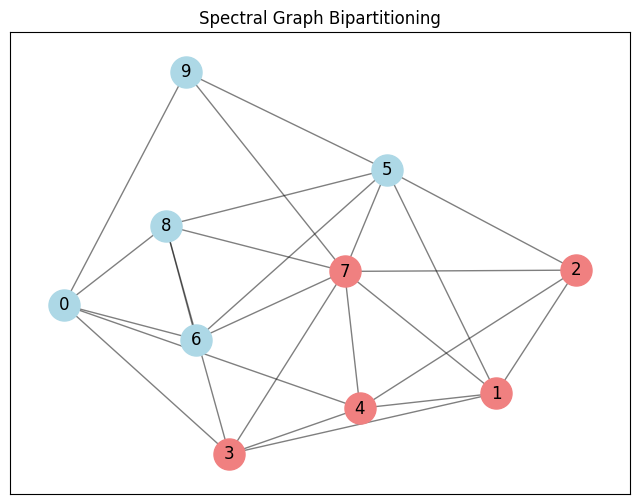

Partition 1: [0 5 6 8 9]
Partition 2: [1 2 3 4 7]


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Create a graph #
# This model generates a random graph with 10 nodes and a 0.5 probability of edge creation between any two nodes #
G = nx.erdos_renyi_graph(10, 0.5)  # Random graph with 10 nodes and probability of edge creation = 0.5 #

# Compute the Laplacian matrix #
L = nx.laplacian_matrix(G).toarray()

# Compute the eigenvalues and eigenvectors of the Laplacian #
eigenvalues, eigenvectors = eigh(L)

# The second smallest eigenvector (Fiedler vector) corresponds to the spectral partitioning #
# The second smallest eigenvector corresponds to the partitioning of the graph #
# The sign of the entries in this vector is used to decide which nodes belong to which partition #
fiedler_vector = eigenvectors[:, 1]
fiedler_vector = eigenvectors[:, 1]

# Partition the graph using the Fiedler vector #
# Nodes corresponding to positive values in the Fiedler vector go into partition 1 #
# Nodes corresponding to negative values go into partition 2 #
partition = fiedler_vector > 0  # Nodes corresponding to positive entries go in one partition, others in another #

# Visualize the graph with the partition #
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for node positions #
plt.title("Spectral Graph Bipartitioning")

# Draw nodes in two colors based on the partition #
nx.draw_networkx_nodes(G, pos, nodelist=np.where(partition)[0], node_color='lightblue', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=np.where(~partition)[0], node_color='lightcoral', node_size=500)

# Draw edges #
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.show()

# Print the partition #
# We print the nodes in each partition based on the sign of the Fiedler vector #
print("Partition 1:", np.where(partition)[0])
print("Partition 2:", np.where(~partition)[0])
